<a href="https://colab.research.google.com/github/C4puto/Machine-Learning/blob/main/C%C3%B3pia_de_Vin%C3%ADcius_Caputo_Classificacao_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Pré-processamento


## 1.1 - Importando os dados

In [99]:
import pandas as pd
import numpy as np


In [100]:
dados = pd.read_csv('https://raw.githubusercontent.com/C4puto/Machine-Learning/main/Customer-Churn%20-%20Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [101]:
dados.shape

(7043, 18)

In [102]:
# Verificando dados em branco
np.sum(dados.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

## 1.2 - Diferentes Variáveis

In [103]:
for col in dados.columns:
  print(col, dados[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [104]:
# Lista de colunas a serem mapeadas
colunas_para_mapeamento = [
    'Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'
]

# Dicionário de mapeamento
troca = {
    'Sim': 1,
    'Nao': 0,
}

# Aplicando o mapeamento a todas as colunas relevantes
dadosbinarios = dados[colunas_para_mapeamento].applymap(troca.get)

# Exibindo as primeiras linhas do DataFrame para verificar
dadosbinarios.head()

<ipython-input-104-87f0c669328e>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dadosbinarios = dados[colunas_para_mapeamento].applymap(troca.get)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [105]:
# Tratamento colunas de classes múltiplas
# Trnsformação pelo get_dummies
# axis = 1 -> representa coluna, porque o padrão é remover linhas

dados_sem_colunas_bin = dados.drop(columns=colunas_para_mapeamento, axis = 1)

# Convertendo colunas de classes múltiplas
dummie_dados = pd.get_dummies(dados_sem_colunas_bin)

# Exibindo as primeiras linhas do DataFrame para verificar
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [106]:
dados_final = pd.concat([dummie_dados, dadosbinarios], axis = 1)
dados_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1,0,0,1,0
1,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0,0,1,0,0
2,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,0,0,1,1,1
3,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0,0,0,0,0
4,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0,0,1,1,1


In [107]:
dados_final.shape

(7043, 39)

## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [108]:
#DICA
pd.set_option('display.max_columns', 39)

In [109]:
dados_final.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1,0,0,1,0
1,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0,0,1,0,0
2,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,0,0,1,1,1
3,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0,0,0,0,0
4,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0,0,1,1,1



$y_i$ = $f(x_i)$

In [110]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [111]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 Balanceamento dos dados

In [112]:
dados_final['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

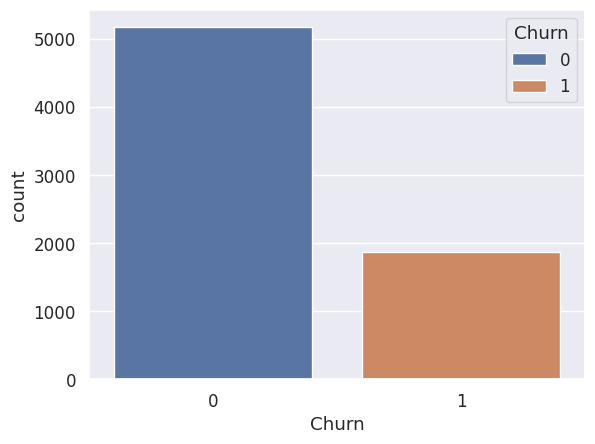

In [113]:
# Variável target está desbalanceada
import seaborn as sns
ax = sns.countplot(x = 'Churn', hue = 'Churn', data = dados_final)

In [114]:
# Biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [115]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [116]:
SEED = 123
smt = SMOTE(random_state = SEED)
X, y = smt.fit_resample(X, y)

In [117]:
# Junção dos dados balanceados
dados_final = pd.concat([X, y], axis = 1)

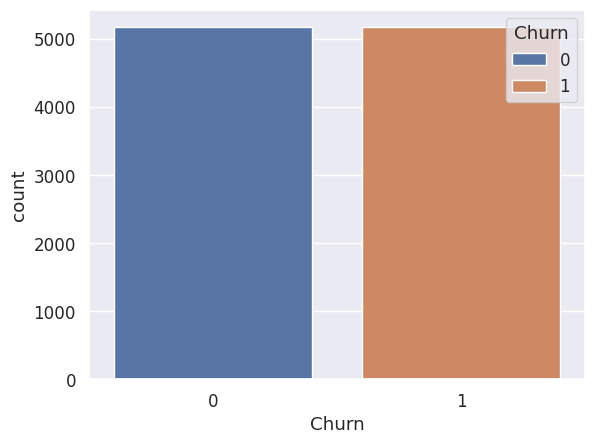

In [118]:
ax = sns.countplot(x = 'Churn', hue = 'Churn', data = dados_final)

# 2 Support Vector Classifier (SVM)


In [119]:
# Importando bibliotecas
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Separandp features (X) e classe (y)
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# Normalizar dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# Separando treino e teste
SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.25, random_state = SEED, stratify = y)
# stratify = y -> Separa proporcionalmente os dados de y, entre 0 e 1

# Criando modelo
svc = SVC(gamma = 'auto', random_state = SEED)

# Treinando modelo
svc.fit(X_treino, y_treino)

# Testar (avaliar) o modelo
previsoes_svc = svc.predict(X_teste)

# Usar o modelo
Xmaria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria_normalizado))

print(Xmaria_normalizado)


[1]
[[-0.41318358 -1.14939314 -2.32476506  1.00426111 -0.32688889 -0.93540224
  85.40578586  0.94470379 -0.44850949 -1.2850268  -0.44850949  1.6771471
  -1.0970768   2.22960721 -0.73976267 -1.08771428 -0.44850949 -0.73991904
   0.78589647  2.22960721  1.64831854 -0.91828591 -0.44850949  1.18102329
  -0.904075    2.22960721 -0.85770576 -0.4605816  -1.45333425 -0.47286547
   1.96830754 -0.94910918 -0.54727528  1.8821746  -0.79008532 -0.52726104
  -3.0591434   0.81449258]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
accuracy_score(y_teste, previsoes)

0.7970622342481639

# 3 Modelo K-nearest neighbors (KNN) - método baseado na proximidade


## 3.1 - Implementando o modelo

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Separandp features (X) e classe (y)
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# Normalizar dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# Separando treino e teste
SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.25, random_state = SEED, stratify = y)
# stratify = y -> Separa proporcionalmente os dados de y, entre 0 e 1

# Criando modelo
knn = KNeighborsClassifier(metric = "euclidean") #, n_neighbors = 5 -> Por padrão é isso

# Treinando modelo
knn.fit(X_treino, y_treino)

# Testar (avaliar) o modelo
previsoes_knn = knn.predict(X_teste)

# Usar o modelo
Xmaria_normalizado = norm.transform(Xmaria)
print(knn.predict(Xmaria_normalizado))

print(Xmaria_normalizado)

[0]
[[-0.41318358 -1.14939314 -2.32476506  1.00426111 -0.32688889 -0.93540224
  85.40578586  0.94470379 -0.44850949 -1.2850268  -0.44850949  1.6771471
  -1.0970768   2.22960721 -0.73976267 -1.08771428 -0.44850949 -0.73991904
   0.78589647  2.22960721  1.64831854 -0.91828591 -0.44850949  1.18102329
  -0.904075    2.22960721 -0.85770576 -0.4605816  -1.45333425 -0.47286547
   1.96830754 -0.94910918 -0.54727528  1.8821746  -0.79008532 -0.52726104
  -3.0591434   0.81449258]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 3.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

# 4 Método probabilístico

## 4.1 - Implementando o modelo

In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Separandp features (X) e classe (y)
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# Normalizar dados
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X)

# Separando treino e teste
SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)
# stratify = y -> Separa proporcionalmente os dados de y, entre 0 e 1

# Criando modelo
mnb = MultinomialNB()

# Treinando modelo
mnb.fit(X_treino, y_treino)

# Testar (avaliar) o modelo
previsoes_mnb = mnb.predict(X_teste)

# Usar o modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# print(mnb.predict(Xmaria_normalizado))
print(mnb.predict(Xmaria))

# print(Xmaria_normalizado)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 4.2 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

## 4.3 - Modelo Bernoulli Naive Bayes



$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

# 5 Método Simbólico

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Separandp features (X) e classe (y)
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# Normalizar dados
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X)

# Separando treino e teste
SEED = 123
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)
# stratify = y -> Separa proporcionalmente os dados de y, entre 0 e 1

# Criando modelo
dtc = DecisionTreeClassifier(max_depth = 5)

# Treinando modelo
dtc.fit(X_treino, y_treino)

# Testar (avaliar) o modelo
previsoes_dtc = dtc.predict(X_teste)

# Usar o modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# print(dtc.predict(Xmaria_normalizado))
print(dtc.predict(Xmaria))

# print(Xmaria_normalizado)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


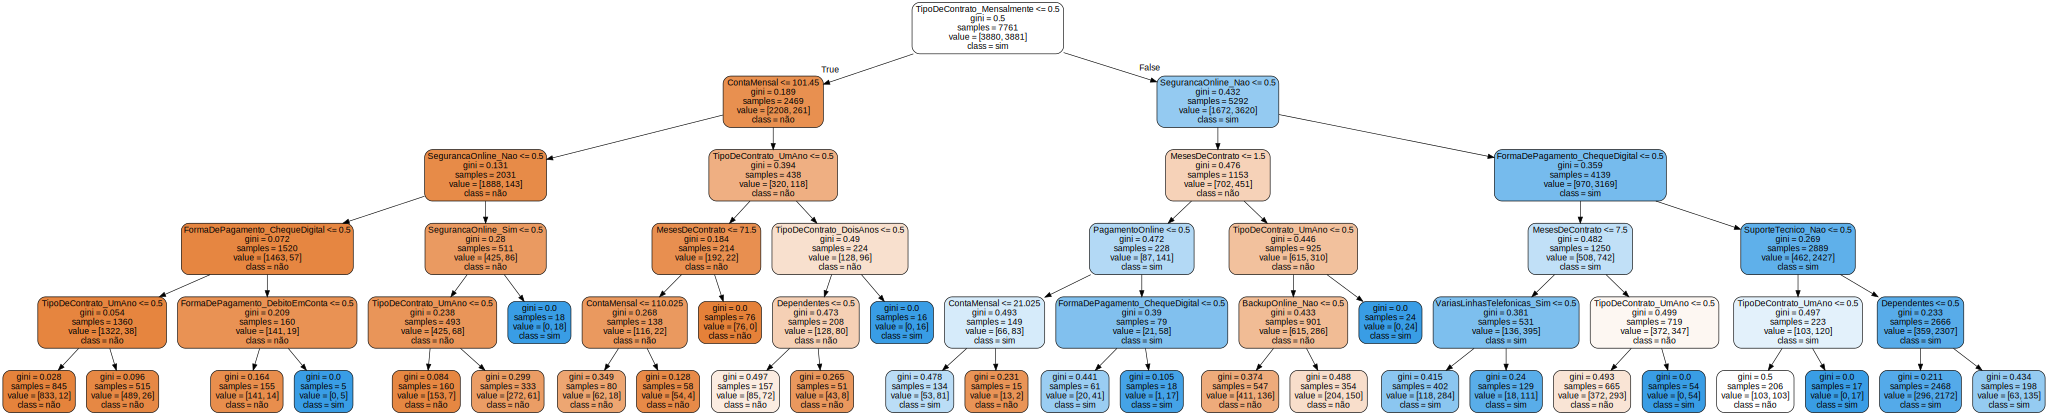

In [124]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(dtc, out_file=None, filled=True, rounded=True, feature_names=features, class_names=["não", "sim"])
graph = graphviz.Source(dot_data)
graph

## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


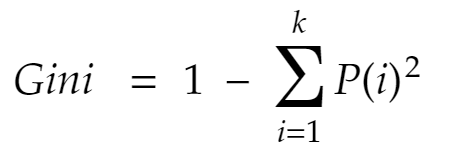

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

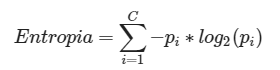


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


# 6 Validação dos modelos

## 6.1 - Matriz de confusão



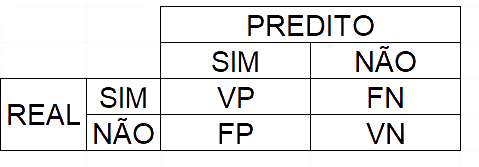

In [125]:
# Função para gerar a matriz de confusão como está no para saber mais.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)

In [126]:
from sklearn.metrics import confusion_matrix

mc_svc = confusion_matrix(y_teste, previsoes_svc)
mc_svc

array([[1109,  185],
       [ 235, 1058]])

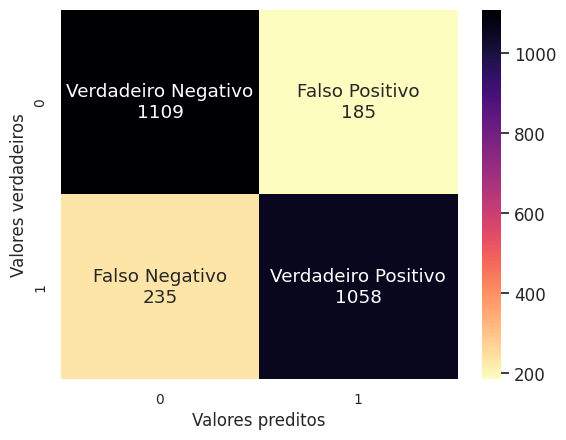

In [127]:
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

In [128]:
mc_knn = confusion_matrix(y_teste, previsoes_knn)
mc_knn

array([[1035,  259],
       [ 215, 1078]])

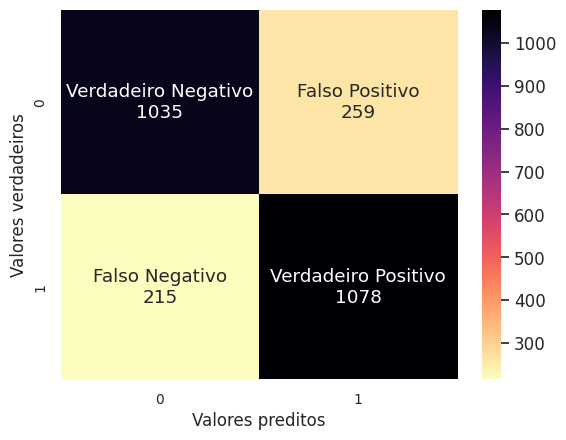

In [129]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

In [130]:
mc_mnb = confusion_matrix(y_teste, previsoes_mnb)
mc_mnb

array([[933, 361],
       [316, 977]])

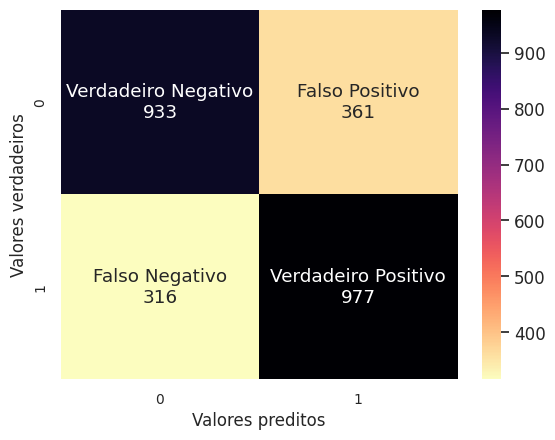

In [131]:
gerando_matriz(mc_mnb, labels, categorias, cmap="magma_r")

In [132]:
mc_dtc = confusion_matrix(y_teste, previsoes_dtc)
mc_dtc

array([[1099,  195],
       [ 330,  963]])

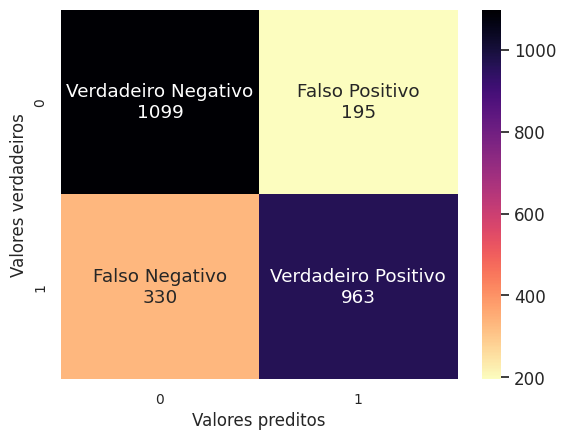

In [133]:
gerando_matriz(mc_dtc, labels, categorias, cmap="magma_r")

## 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [134]:
from sklearn.metrics import accuracy_score

acuracia_svc = accuracy_score(y_teste, previsoes_svc)
print(f"Acurácia SVC: {acuracia_svc}")

acuracia_knn = accuracy_score(y_teste, previsoes_knn)
print(f"Acurácia KNN: {acuracia_knn}")

acuracia_mnb = accuracy_score(y_teste, previsoes_mnb)
print(f"Acurácia MNB: {acuracia_mnb}")

acuracia_dtc = accuracy_score(y_teste, previsoes_dtc)
print(f"Acurácia DTC: {acuracia_dtc}")

Acurácia SVC: 0.8376497873985311
Acurácia KNN: 0.8167761886354851
Acurácia MNB: 0.7383069192114419
Acurácia DTC: 0.7970622342481639


## 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [135]:
from sklearn.metrics import precision_score

precision_svc = precision_score(y_teste, previsoes_svc)
print(f"Precisão SVC: {precision_svc}")

precision_knn = precision_score(y_teste, previsoes_knn)
print(f"Precisão KNN: {precision_knn}")

precision_mnb = precision_score(y_teste, previsoes_mnb)
print(f"Precisão MNB: {precision_mnb}")

precision_dtc = precision_score(y_teste, previsoes_dtc)
print(f"Precisão DTC: {precision_dtc}")

Precisão SVC: 0.8511665325824618
Precisão KNN: 0.806282722513089
Precisão MNB: 0.7301943198804185
Precisão DTC: 0.8316062176165803


## 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [137]:
from sklearn.metrics import recall_score

recall_svc = recall_score(y_teste, previsoes_svc)
print(f"Recall SVC: {recall_svc}")

recall_knn = recall_score(y_teste, previsoes_knn)
print(f"Recall KNN: {recall_knn}")

recall_mnb = recall_score(y_teste, previsoes_mnb)
print(f"Recall MNB: {recall_mnb}")

recall_dtc = recall_score(y_teste, previsoes_dtc)
print(f"Recall DTC: {recall_dtc}")

Recall SVC: 0.8182521268368136
Recall KNN: 0.8337200309358082
Recall MNB: 0.7556071152358855
Recall DTC: 0.7447795823665894


## 6.5 - Escolhendo o melhor modelo


In [133]:
O melhor modelo é o SVC, pois ele tem a melhor precisão e um recall alto.